# Modulo 1

## Regresión Linear


Para el primer módulo estudiaremos los modelos clásicos de Machine Learning. 
Es decir, aquellos que solo son una capa dentro del modelo, o para ser más 
exactos son una sola función sin tener una composición de funciones como en las 
redes neuronales.


Para ello contruiremos un modelo de ML para regresión linear:
- Primero con una serie de datos aleatorios
- En la segunda iteración, utilizaremos un algoritmo de minimización por derivadas
- En la tercera utilizaremos diferentes bibliotecas para utilizar los modelos de ML

In [1]:
# Vamos a importar numypy para construir matrices y vectores para el modelo
# y vamos por pandas para leer los datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
# Importando los datos para el modelo
data = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")

In [3]:

# Vamos a explorar los datos
data.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HousePrice       99 non-null     int64  
 1   HsPrc ($10,000)  99 non-null     float64
 2   CrimeRate        99 non-null     float64
 3   MilesPhila       99 non-null     float64
 4   PopChg           98 non-null     float64
 5   Name             99 non-null     object 
 6   County           99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [5]:
data.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


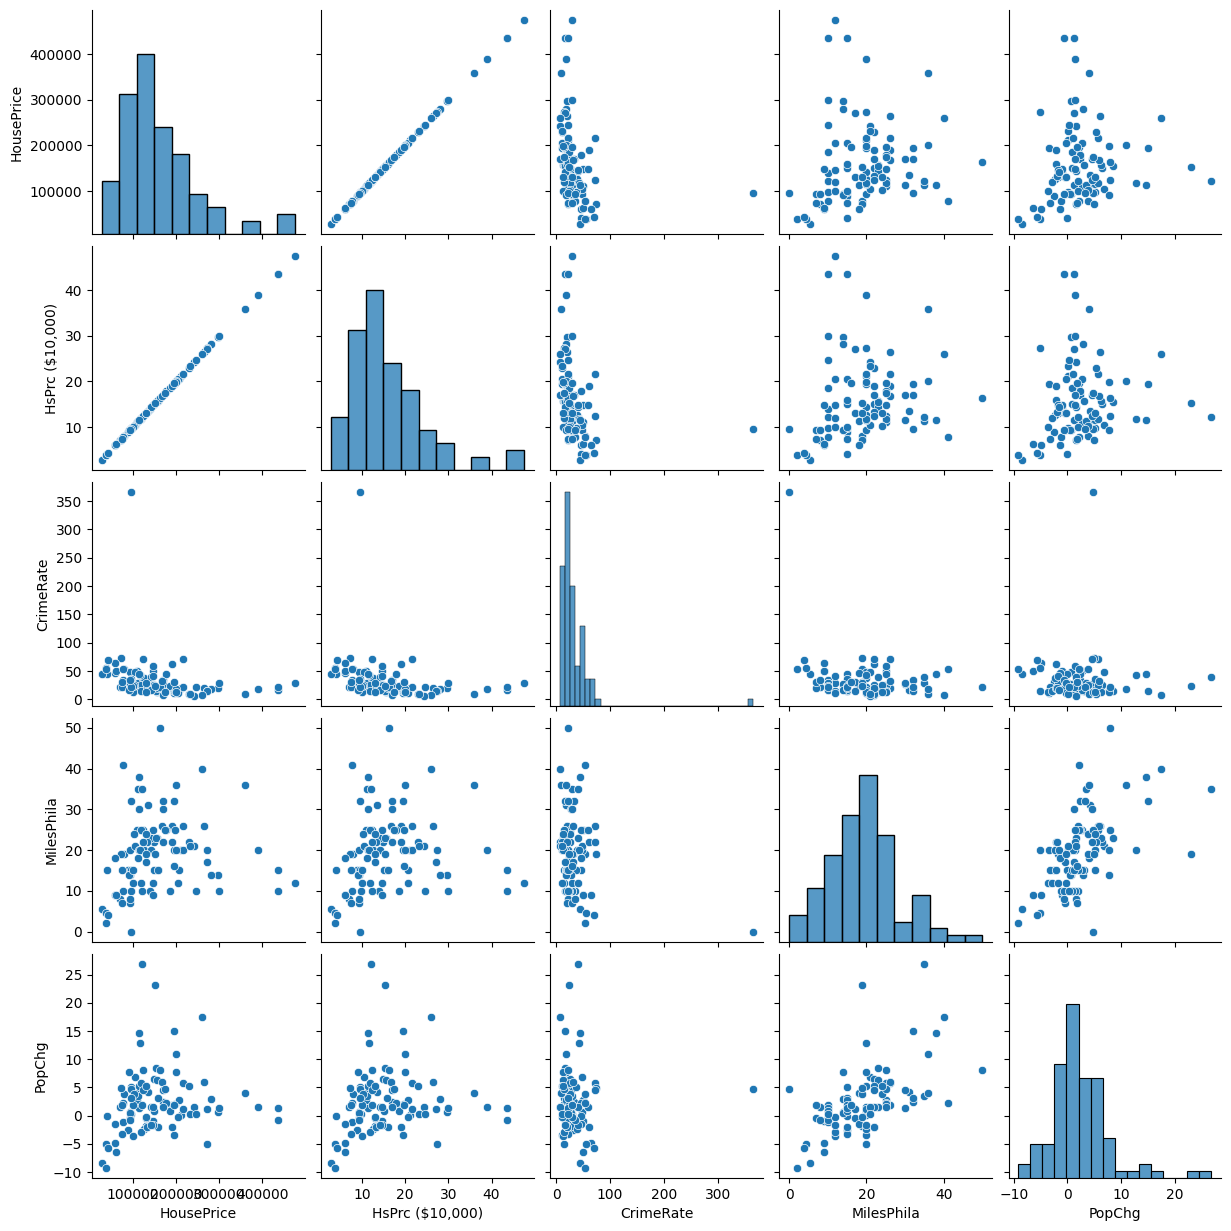

In [6]:
sns.pairplot(data)

### Preparar datos

Elegir las columnas para hacer un anlísis lineal: CrimeRate vs HousePrice

In [153]:
# tomando la columna de crimen y la de precio de la casa
Y = data['CrimeRate']
X = data['HousePrice']

Y_copy = Y.copy()
X_copy = X.copy()

### Codeando mi primer ML model usando Mínimos Cuadrados

Las formulas para obtener la pendiente b1 y la ordenada al origen b0 son:

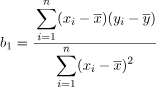

In [122]:
# Calculando los pesos estadisticos M (pendiente) y B (intercepto
X1 = np.array(X).reshape(-1, 1) - np.mean(X)
Y1 = np.array(Y).reshape(-1, 1) - np.mean(Y)
Xup = X1 * Y1
Xdown = np.power(X1 - np.mean(X), 2)
M = Xup.sum() / Xdown.sum()
M = M.sum()

In [123]:
# Calculando el intercepto
B = np.mean(Y) - M * np.mean(X)
B = B.sum()

In [124]:
indice_crimen = 200000
Xnew = np.array([indice_crimen])
Ynew = Xnew * M + B

indice_crimen2 = 400000
Xnew2 = np.array([indice_crimen2])
Ynew2 = Xnew2 * M + B

indice_crimen3 = 900
Xnew3 = np.array([indice_crimen3])
Ynew3 = Xnew3 * M + B

In [125]:
Ynew.shape

(1,)

In [126]:
Ynew

array([31.52754786])

In [127]:

X_line = np.linspace(1, 1000000, 10)
Y_line = X_line * M + B

/tmp/ipykernel_1119/31556808.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(Xnew, Ynew, "b.", label="Predictions1", color='red')
/tmp/ipykernel_1119/31556808.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(Xnew2, Ynew2, "b.", label="Predictions2", color='green')
/tmp/ipykernel_1119/31556808.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(Xnew3, Ynew3, "b.", label="Predictions3", color='yellow')
/tmp/ipykernel_1119/31556808.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_line, Y_line, "-r"

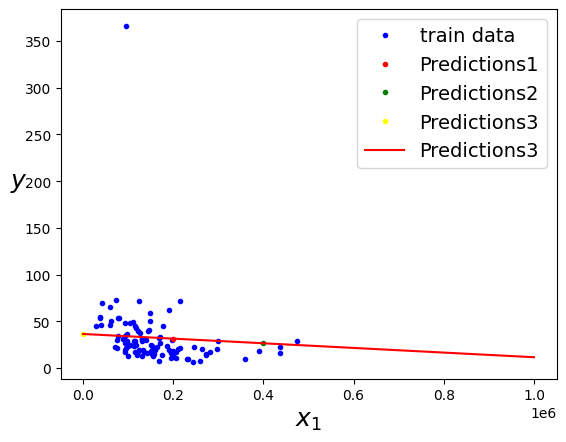

In [128]:
from matplotlib import pyplot as plt

plt.plot(X, Y, "b.", label="train data")
plt.plot(Xnew, Ynew, "b.", label="Predictions1", color='red')
plt.plot(Xnew2, Ynew2, "b.", label="Predictions2", color='green')
plt.plot(Xnew3, Ynew3, "b.", label="Predictions3", color='yellow')
plt.plot(X_line, Y_line, "-r", label="Predictions3", color='red')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

## Regresión Multilinear

In [47]:
import numpy as np

# Generar datos de ejemplo
# Creamos una muestra de datos con múltiples características y una relación lineal.
np.random.seed(0)
X = 2 * np.random.rand(100, 3)  # 100 muestras, 3 características
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + 5 * X[:, 2] + np.random.randn(100, 1)  # relación lineal con ruido

# Añadir una columna de unos a X para el término de intercepción (bias)
X_b = np.c_[np.ones((100, 1)), X]  # Añadir x0 = 1 a cada instancia

# Calcular los coeficientes de la regresión lineal usando la fórmula de la ecuación normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Imprimir los coeficientes
print("Coeficientes:", theta_best)

# Hacer predicciones
X_new = np.array([[1, 0, 2], [2, 2, 2]])  # Nuevas muestras (sin columna de unos)
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Añadir columna de unos
y_predict = X_new_b.dot(theta_best)

print("Predicciones:", y_predict)


Coeficientes: [[ 1.61314862e+01  1.53730733e+01  1.97794568e+01  1.47067124e+01
   1.17712284e+01  1.28800617e+01  2.18853864e+01  1.83963745e+01
   8.65307742e+00  1.58522401e+01  1.31959857e+01  1.36123318e+01
   1.95280050e+01  1.38494868e+01  1.50445701e+01  1.01048343e+01
   1.29995948e+01  1.15557664e+01  1.23797958e+01  9.77946253e+00
   1.19088279e+01  9.25289276e+00  1.76440275e+01  1.31191542e+01
   1.96227983e+01  6.51853412e+00  9.38179776e+00  1.36171030e+01
   1.36438611e+01  1.61106049e+01  9.84924776e+00  1.12377151e+01
   1.58391220e+01  9.38973264e+00  1.46976637e+01  1.54978447e+01
   1.35709535e+01  1.48009525e+01  1.92300558e+01  1.78901085e+01
   1.98678735e+01  1.55735074e+01  1.18734077e+01  1.24504283e+01
   1.16558367e+01  1.63247597e+01  1.85539732e+01  1.68182784e+01
   1.26052010e+01  2.23125448e+01  9.94433731e+00  1.66189335e+01
   1.51423636e+01  1.16903578e+01  2.15032919e+01  1.27316709e+01
   1.42270420e+01  5.26144588e+00  1.30616157e+01  1.26547486e

# Regresión Linear con Scikit Learn (Librería de ML)

In [154]:
# Usando una libreria para hacer la regresion lineal
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

# Creando el modelo
model = LinearRegression()

# Entrenando el modelo
# Convertir la serie de pandas a un array de numpy
X1_m = X_copy.values.reshape(-1, 1)
Y1_m = Y_copy.values.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X1_m, Y1_m, test_size=0.2, random_state=42)

# # Normalizar los datos
# X_train = (X_train - np.mean(X_train)) / np.std(X_train)
# X_test = (X_test - np.mean(X_train)) / np.std(X_train)
# Y_train = (Y_train - np.mean(Y_train)) / np.std(Y_train)
# Y_test = (Y_test - np.mean(Y_train)) / np.std(Y_train)

# X1_m = np.array(X_copy).reshape(-1, 1)
# Y1_m = np.array(Y_copy).reshape(-1, 1)
# Y1_m = np.array(Y_copy).reshape(-1, 1)
model.fit(X=X_train, y=Y_train)

# Haciendo predicciones
indice_crimen = 200000
Xnew_m = np.array(indice_crimen).reshape(-1, 1)
Ynew_m = model.predict(Xnew_m)

indice_crimen2 = 400000
Xnew2_m = np.array(pd.Series(indice_crimen2)).reshape(-1, 1)
Ynew2_m = model.predict(Xnew2_m)

indice_crimen3 = 900
Xnew3_m = np.array(pd.Series(indice_crimen3)).reshape(-1, 1)
Ynew3_m = model.predict(Xnew3_m)

In [158]:
Ynew2_m, Ynew2

(array([[3.15078397]]), array([26.55074295]))

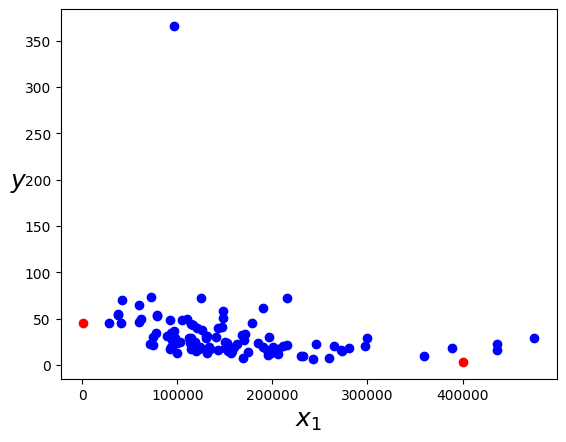

In [160]:
plt.plot(X1_m, Y1_m, color='blue', marker='o', linestyle='None')
plt.plot(Xnew3_m, Ynew3_m, color='red', marker='o', linestyle='None')
plt.plot(Xnew2_m, Ynew2_m, color='red', marker='o', linestyle='None')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()